k Fold Cross Validation


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [20]:
X, y = load_wine(return_X_y = True)

X = np.array(X)
y = np.array(y)

In [21]:
print(len(X),len(y))

178 178


In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [24]:
accuracy_scores = []

for k, (train_idx, val_idx) in enumerate(kf.split(X)):
  X_train, X_val = X[train_idx], X[val_idx]
  y_train, y_val = y[train_idx], y[val_idx]
  model = LogisticRegression(solver='liblinear',max_iter=1000, C=0.01)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val,y_pred)
  print(f'Fold: {k+1} Accuracy:{accuracy}%')
  accuracy_scores.append(accuracy)

Fold: 1 Accuracy:0.9444444444444444%
Fold: 2 Accuracy:0.9444444444444444%
Fold: 3 Accuracy:1.0%
Fold: 4 Accuracy:0.9444444444444444%
Fold: 5 Accuracy:0.8888888888888888%
Fold: 6 Accuracy:0.9444444444444444%
Fold: 7 Accuracy:0.9444444444444444%
Fold: 8 Accuracy:0.8333333333333334%
Fold: 9 Accuracy:1.0%
Fold: 10 Accuracy:0.8235294117647058%


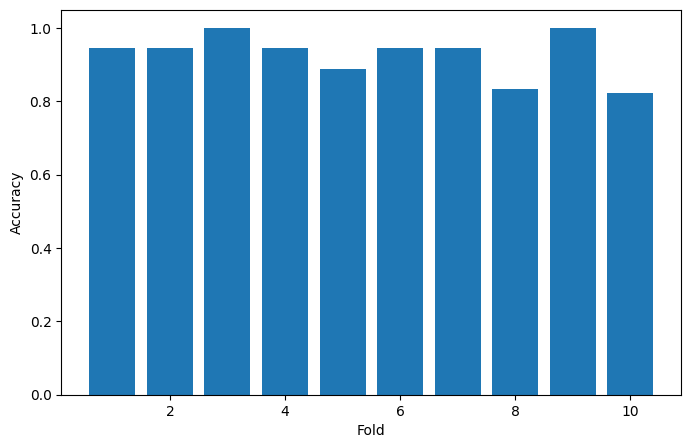

In [25]:
plt.figure(figsize=(8,5))
plt.bar(range(1,kf.get_n_splits() + 1), accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [26]:
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy = {mean_accuracy}')

Mean Accuracy = 0.926797385620915
